### Generate N = 10000 random numbers from [0, 1]

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
np.random.seed(seed = 42)
X = (np.random.random(10000)).reshape(10000, 1)
y = np.sqrt(1 + X)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
len(X_train)

8000

In [5]:
X_train

array([[0.42380819],
       [0.33616534],
       [0.86529576],
       ...,
       [0.79275811],
       [0.40680929],
       [0.05784445]])

In [6]:
y_train

array([[1.19323434],
       [1.15592618],
       [1.36575831],
       ...,
       [1.33893917],
       [1.18608992],
       [1.02851565]])

In [7]:
ones = np.ones(shape = (len(X_train), 1))
X_train_ = np.append(ones, X_train, axis = 1)
ones = np.ones(shape = (len(X_test), 1))
X_test_ = np.append(ones, X_test, axis = 1)

In [8]:
X_train_

array([[1.        , 0.42380819],
       [1.        , 0.33616534],
       [1.        , 0.86529576],
       ...,
       [1.        , 0.79275811],
       [1.        , 0.40680929],
       [1.        , 0.05784445]])

In [9]:
# THIS NEED FOR FURTHER SHUFFLING
train_data = np.column_stack((X_train_, y_train))

In [10]:
train_data.shape

(8000, 3)

### Do linear regression on your generated data using stochastic gradient descent

In [11]:
def loss_matrix(x, y, theta):
    return (np.dot(x, theta) - y)

In [12]:
def mse(loss_arr):
#     print(loss_arr ** 2)
    return (1 / (2 * len(loss_arr))) * sum(loss_arr ** 2)

In [51]:
def sgd(num_iterations, train_data):
    learning_rate = 0.01
    theta = np.squeeze(np.random.random((2, 1)))
    loss_history = []
    theta_history = []
    for _ in range(num_iterations):
        np.random.shuffle(train_data)
        for i in range(len(train_data)):
            X, y = train_data[i, 1], train_data[i, 2]
            loss_val = loss_matrix([1, X], y, theta)
            theta = theta - learning_rate  * loss_val * X
            
        loss_m = loss_matrix(train_data[:, :2], train_data[:, 2], theta)
        mse_loss_m = mse(loss_m)
        
        if mse_loss_m < 0.000005:
            return theta
        
        loss_history.append(mse(loss_m))
        theta_history.append(theta)
    
    
   # print(loss_history)
    print(loss_history[np.argmin(loss_history)])
    return theta_history[np.argmin(loss_history)]

In [52]:
theta_sgd = sgd(20, train_data)

0.0003736253187765269


In [53]:
theta_sgd

array([0.95964853, 0.4958126 ])

In [54]:
test_data = np.column_stack((X_test_, y_test))
loss_m = loss_matrix(test_data[:, :2], test_data[:, 2], theta_sgd)
mse_loss_m = mse(loss_m)
mse_loss_m

0.00037986220205161986

### Do linear regression on your generated data using mini-bacth gradient descent

In [80]:
import math
def mbgd(num_iterations, train_data):
    learning_rate = 0.01
    theta = np.squeeze(np.random.random((2, 1)))
    batch_size = 15
    
    supremum = math.ceil(len(train_data) / batch_size)
    
    loss_history = []
    theta_history = []
    
    for _ in range(num_iterations):
        np.random.shuffle(train_data)
        
        for i in range(supremum):
            
            inner_loss = 0
            for k in range((i - 1) * batch_size + 1, i * batch_size + 1):
                X, y = train_data[k, 1], train_data[k, 2]
                #print('test', (loss_matrix([1, X], y, theta) * X))
                inner_loss += (loss_matrix([1, X], y, theta) * X)
         
            theta = theta - (learning_rate / batch_size) * inner_loss
        
        loss_m = loss_matrix(train_data[:, :2], train_data[:, 2], theta)
        mse_loss_m = mse(loss_m)
        
        if mse_loss_m < 0.0000005:
            return theta
        
        loss_history.append(mse(loss_m))
        theta_history.append(theta)
    
    
    #print(loss_history)
    print(loss_history[np.argmin(loss_history)])
    return theta_history[np.argmin(loss_history)]

In [83]:
theta_mbgd = mbgd(20, train_data)

9.865848226542642e-05


In [84]:
test_data = np.column_stack((X_test_, y_test))
loss_m = loss_matrix(test_data[:, :2], test_data[:, 2], theta_mbgd)
mse_loss_m = mse(loss_m)
mse_loss_m

9.847963111747159e-05

### Do linear regression on your generated data using tensorflow.

In [117]:
import tensorflow as tf
tf.set_random_seed(42)

In [118]:
X = tf.placeholder("float") 
Y = tf.placeholder("float") 

In [119]:
W = tf.Variable(np.random.randn(), name = "weights") 
B = tf.Variable(np.random.randn(), name = "bias")

In [120]:
pred = tf.add(tf.multiply(X, W), B)
cost = tf.reduce_sum((pred - Y) ** 2)
learning_rate = 0.001
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [121]:
epochs = 10

In [122]:
init = tf.global_variables_initializer()

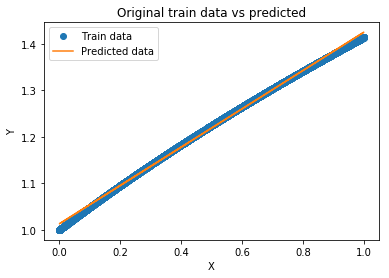

In [123]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(epochs):
        for x, y in zip(X_train, y_train):
            sess.run(optimizer, feed_dict={X: x, Y: y})
            
        if not epoch % 20:
            c = sess.run(cost, feed_dict={X: X_train, Y: y_train})
            w = sess.run(W)
            b = sess.run(B)
            #print(f'epoch: {epoch:04d} c={c:.4f} w={w:.4f} b={b:.4f}')
            
    weight = sess.run(W)
    bias = sess.run(B)
    plt.title('Original train data vs predicted')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.plot(X_train, y_train, 'o', label = 'Train data')
    plt.plot(X_train, weight * X_train + bias, label = 'Predicted data')
    plt.legend()
    plt.show()

In [124]:
y_pred = weight * X_test + bias
y_pred

array([[1.16899375],
       [1.01860891],
       [1.27931852],
       ...,
       [1.40646608],
       [1.16390566],
       [1.33877099]])

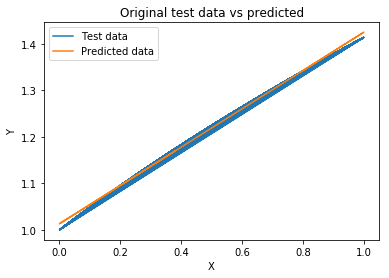

In [125]:
plt.title('Original test data vs predicted')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(X_test, y_test, label = 'Test data')
plt.plot(X_test, y_pred, label = 'Predicted data')
plt.legend()
plt.show()

### Sketch the graphs of all approximations on one graph.

In [126]:
y_pred_sgd = theta_sgd[0] + theta_sgd[1] * X_test
y_pred_mbgd = theta_mbgd[0] + theta_mbgd[1] * X_test
y_pred_tf = y_pred

In [127]:
theta_sgd[0], theta_sgd[1]

(0.9596485332660645, 0.4958125965197618)

In [128]:
theta_mbgd[0], theta_mbgd[1]

(0.98706188911037, 0.4517025465518424)

In [129]:
bias, weight

(1.0132524, 0.41198036)

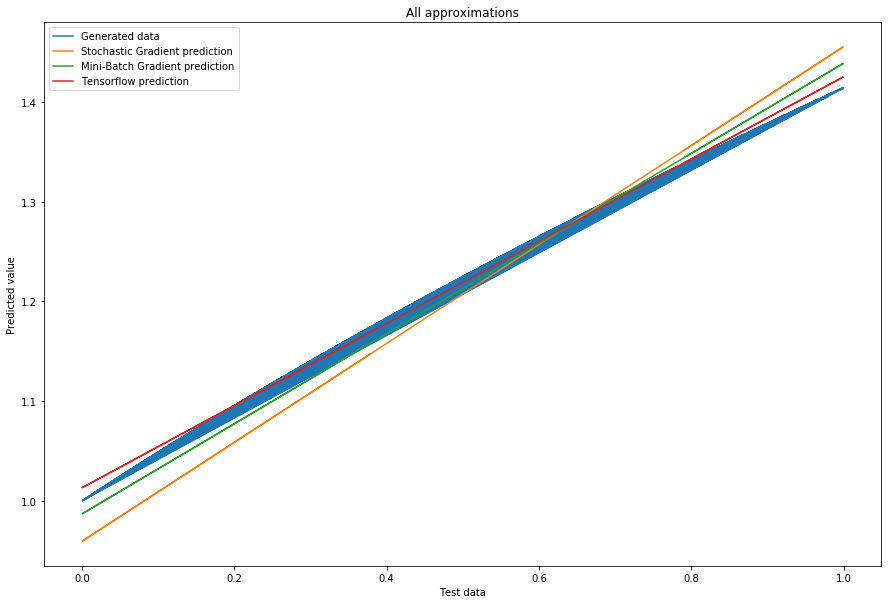

In [130]:
# need to add also tensorflow solution
plt.figure(figsize = (15, 10))
plt.plot(X_test, y_test, label = 'Generated data')
plt.plot(X_test, y_pred_sgd, label = 'Stochastic Gradient prediction')
plt.plot(X_test, y_pred_mbgd, label = 'Mini-Batch Gradient prediction')
plt.plot(X_test, y_pred_tf, label = 'Tensorflow prediction')
plt.legend()
plt.title('All approximations')
plt.xlabel('Test data')
plt.ylabel('Predicted value')
plt.show()

### Taylor approximation

f(x) ~ f(a) + f'(a)*(x - a)

In [131]:
def derivative(point):
    return (1 / 2) * (1 + point)**(-1/2)

In [132]:
def taylor_approximation(point):
    return 1 + derivative(point[0])*point[0]

In [133]:
y_pred_taylor = list(map(taylor_approximation, X_test))
y_pred_taylor = np.array(y_pred_taylor).reshape((len(y_pred_taylor), 1))

In [134]:
y_pred_taylor

array([[1.16101561],
       [1.00645911],
       [1.25170487],
       ...,
       [1.34135802],
       [1.1564579 ],
       [1.29527512]])

### Compare all solutions with the first degree Taylor approximation of the function

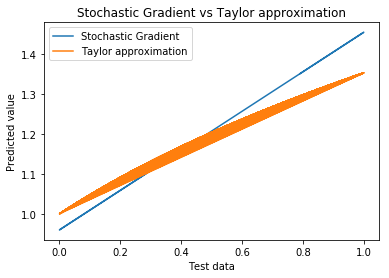

In [135]:
# stochastic gradient solution
plt.plot(X_test, y_pred_sgd, label = 'Stochastic Gradient')
plt.plot(X_test, y_pred_taylor, label = 'Taylor approximation')
plt.legend()
plt.xlabel('Test data')
plt.ylabel('Predicted value')
plt.title('Stochastic Gradient vs Taylor approximation')
plt.show()

In [136]:
mse(y_pred_sgd - y_pred_taylor)

array([0.00098885])

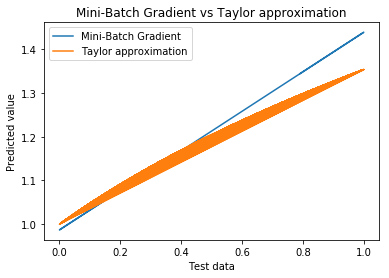

In [137]:
# mini-batch gradient descent
plt.plot(X_test, y_pred_mbgd, label = 'Mini-Batch Gradient')
plt.plot(X_test, y_pred_taylor, label = 'Taylor approximation')
plt.legend()
plt.xlabel('Test data')
plt.ylabel('Predicted value')
plt.title('Mini-Batch Gradient vs Taylor approximation')
plt.show()

In [138]:
mse(y_pred_mbgd - y_pred_taylor)

array([0.00060841])

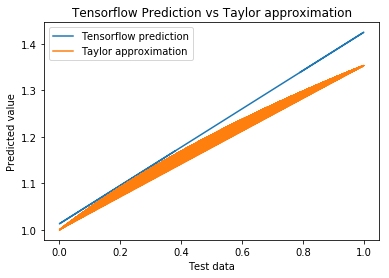

In [139]:
# tensorflow
plt.plot(X_test, y_pred_tf, label = 'Tensorflow prediction')
plt.plot(X_test, y_pred_taylor, label = 'Taylor approximation')
plt.legend()
plt.xlabel('Test data')
plt.ylabel('Predicted value')
plt.title('Tensorflow Prediction vs Taylor approximation')
plt.show()

In [140]:
mse(y_pred_tf - y_pred_taylor)

array([0.00046937])